## Visualising CMIP data
In this lesson we are going to give an inro on how to work with NetCDF files in Python and create a quick plot of the ACCESS1-3 historical precipitation climatology data. 

In [ ]:
# Create a variable that represents the path of the NetCDF file we will be working with
access_pr_file = '../data/pr_Amon_ACCESS1-3_historical_r1i1p1_200101-200512.nc'

Import all the libraries that are needed for this section:

In [2]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np
import cmocean

Since geographic data files can often be very large, when we first open our data file in xarray it simply loads the metadata associated with the file (this is known as “lazy loading”). We can then view summary information about the contents of the file before deciding whether we’d like to load some or all of the data into memory.

In [ ]:
# The xarray library has the function xarray.open_dataset to load our file into an xarray dataset strucutre
dset = xr.open_dataset(access_pr_file)

In [ ]:
# Print the dataset to have a look how the file is structured.
print(dset)

We can see that our dset object is an xarray.Dataset, which when printed shows all the metadata associated with our netCDF data file:  
* Dimensions: lat, lon, time
* Data variables: pr, lat, lon, time
* Attributes: Describes the general dataset = metadata

In this case, we are interested in the precipitation variable contained within that xarray Dataset:

In [ ]:
# Select the variable, the same way you would select a column in a Pandas Dataframe, using square brackets: 
dset["pr"]

#Print out this variable
print(dset['pr']) # or dset.pr

It returns a snippet of the values in the array, the coordinates and the attributes associated with the precipitation `xarray.Dataset`.

We can actually use either the dset['pr'] or dset.pr syntax to access the precipitation xarray.DataArray.

### Aggregating data

To calculate the precipitation climatology, we can make use of the fact that xarray DataArrays have built in functionality for averaging over their dimensions. We select the dimension 'time' here. We also want to display the attributes of the original object:

In [ ]:
clim = dset['pr'].mean('time', keep_attrs=True)
print(clim)

The coordinate 'time' has disappeared since we calculated the mean precipitation over the 'time' dimension.

### Calculations with arrays
Now that we’ve calculated the climatology, we want to convert the units from kg m-2 s-1 to something that we are a little more familiar with like mm day-1.

Convert the units from $kg \: m^{-2} \: s^{-1}$ to $mm \: day^{-1}$.

(You have to consider that:
- $1 \: kg$ of rain water spread over $1 \: m^2$ of surface is $1 \: mm$ in thickness;
- there are $60 \times 60 \times 24 = 86400$ seconds in one day.

Therefore, $1 kg \: m^{-2} \: s^{-1} = 86400 mm \: day^{-1}$)

In [ ]:
# Structure of the entire array
print(type(clim))

In [ ]:
# Strcutre of the data part in the clim array
print(type(clim.data))

The data associated with our xarray DataArray is a numpy array. We can go ahead and multiply that array by 86400 and update the units attribute accordingly:

In [ ]:
clim.data = clim.data * 86400 #multiply only the data part of the array
clim.attrs['units'] = 'mm/day' #adjust the attribute units
clim

##### NOTE on VECTORISATION
In order to multiply every value in the array, note that there is no use of a for loop. The advantage of arrays and the homogeneity of the data it contains, is that it is possible to apply a certain function simulatiously over many values instead of a single value. This is called "Vectorisation".

### Plotting arrays
We could now go ahead and plot our climatology using matplotlib, but it would take many lines of code to extract all the latitude and longitude information and to setup all the plot characteristics. Recognising this burden, the xarray developers have built on top of matplotlib.pyplot to make the visualisation of xarray DataArrays much easier. 

Cartopy has exposed an interface to enable easy map creation using matplotlib. Creating a basic map involves telling matplotlib to use a specific map projection, and then adding some coastlines to the axes:

(Use the built in `%matplotlib inline` magic command to make plots appear in the notebook rather than in a separate window.) 

In [ ]:
%matplotlib inline

In [ ]:
fig = plt.figure(figsize=[12,5])  #create a new figure

ax = fig.add_subplot(111, projection=ccrs.PlateCarree(central_longitude=180)) # Add an Axes to the figure 

#add  the filled contour plot to the already-set-up plot region
clim.plot.contourf(ax=ax,
                   levels=np.arange(0, 13.5, 1.5),
                   extend='max',
                   transform=ccrs.PlateCarree(),
                   cbar_kwargs={'label': clim.units})


ax.coastlines()                 
plt.show()
#plt.savefig('../fig/02-visualisation-viridis.svg')

The default colorbar used by matplotlib is `viridis`. It used to be `jet`, but that was changed a couple of years ago in response to the [#endtherainbow](https://www.climate-lab-book.ac.uk/2014/end-of-the-rainbow/) campaign.

Putting all the code together (and reversing viridis so that wet is purple and dry is yellow)...

In [ ]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np

access_pr_file = '../data/pr_Amon_ACCESS1-3_historical_r1i1p1_200101-200512.nc'

dset = xr.open_dataset(access_pr_file)

clim = dset['pr'].mean('time', keep_attrs=True)

clim.data = clim.data * 86400
clim.attrs['units'] = 'mm/day'

fig = plt.figure(figsize=[12,5])
ax = fig.add_subplot(111, projection=ccrs.PlateCarree(central_longitude=180))
clim.plot.contourf(ax=ax,
                   levels=np.arange(0, 13.5, 1.5),
                   extend='max',
                   transform=ccrs.PlateCarree(),
                   cbar_kwargs={'label': clim.units},
                   cmap='viridis_r') 

ax.coastlines()
#plt.savefig('../fig/02-visualisation-viridis_r.svg')
plt.show()

**Challenge:** Copy and paste that slab of code into your own Jupyter notebook. Make the following additions/edits to the plot:  

1. The viridis color palette doesn’t seem quite right for rainfall. Change it to the “rain” [cmocean](http://matplotlib.org/cmocean/) palette used for ocean salinity data. The **cmocean library** contains colormaps custom made for the ocean sciences.   

2. Add a title to the plot which gives the name of the model (taken from the dset attributes, i.e `dset.attr`), followed by the words “precipitation climatology (JJA)”.  

3. Rather than plot the annual climatology, edit the code so that it plots the June-August (JJA) season. HINT: the **groupby functionality** can be used to group all the data into seasons (`groupby('time.season')`) prior to averaging over the time axis.


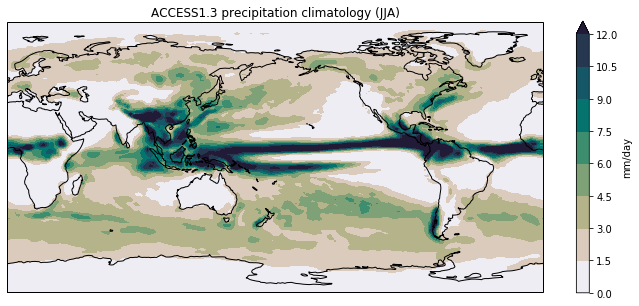

In [8]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np

access_pr_file = '../data/pr_Amon_ACCESS1-3_historical_r1i1p1_200101-200512.nc'

dset = xr.open_dataset(access_pr_file)

clim = dset['pr'].groupby('time.season').mean('time', keep_attrs=True) 
#clim = dset['pr'].mean('time', keep_attrs=True)

clim.data = clim.data * 86400
clim.attrs['units'] = 'mm/day'

fig = plt.figure(figsize=[12,5])
ax = fig.add_subplot(111, projection=ccrs.PlateCarree(central_longitude=180))
clim.sel(season='JJA').plot.contourf(ax=ax,
                   levels=np.arange(0, 13.5, 1.5),
                   extend='max',
                   transform=ccrs.PlateCarree(),
                   cbar_kwargs={'label': clim.units},
                   cmap=cmocean.cm.rain) #"cmocean.cm.rain"

title = '%s precipitation climatology (JJA)' %(dset.attrs['model_id'])
plt.title(title)


ax.coastlines()
#plt.savefig('../fig/02-visualisation-viridis_r.svg')
plt.show()
